# <center> Heart Disease Prediction</center>

# <center>Project Title: Heart Disease Prediction</center>
## Group Members:
<ol>
    <li>Kaushik Prakash (BCA+MCA)</li>
    <li>Om Prakash (BCA)</li>
</ol>

### importing libraries

In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,accuracy_score, classification_report,precision_recall_curve, average_precision_score,ConfusionMatrixDisplay

## <center> Dataset Columns </center>
<ol>
    <li>age - Age of Person</li>
    <li>sex - gender of Person</li>
    <li>cp - Chest Pain</li>
    <li>trestbps -reting blood pressures</li>
    <li>chol - serum cholestoral in mg/dl</li>
    <li>fbs - fasting blood sugar</li>
    <li>restecg - resting electrocardiographic results</li>
    <li>thalach - maximum heart rate achieved</li>
    <li>exang - exercise induced angina</li>
    <li>oldpeak - ST depression induced by exercise relative to rest</li>
    <li>slope - the slope of the peak exercise ST segment</li>
    <li>ca - number of major vessels (0-3) colored by flourosopy</li>
    <li>thal: 0 = normal; 1 = fixed defect; 2 = reversable defect</li>
    <li>target: 0 = died; 1 = live</li>
</ol>
<a href = "https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset">Dataset Source</a>

# Loading dataset and storing in data

In [3]:
data = pd.read_csv("heart.csv")

# Exploratory Data Analysis

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#checking for null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#check for columns in dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='target'>

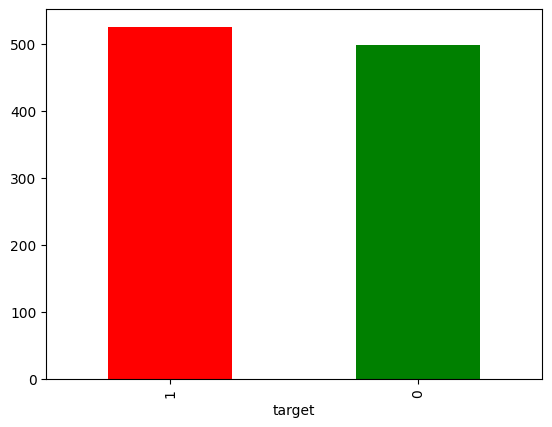

In [10]:
#plotting the death caused by heart
data.target.value_counts().plot(kind="bar",color=["red","green"])

In [11]:
#identify the categorical and continous variable and storing them into list
categorical_data = []
continous_data = []
for col in data.columns:
    if len(data[col].unique())<=10:
        print(f"{col} is a categorical variable/column \n")
        categorical_data.append(col)
    else:
        print(f"{col} is a continous variable/column \n")
        continous_data.append(col)
print(f"Categorical variable in dataset: {categorical_data}")
print(f"continous variable in dataset: {continous_data}")

age is a continous variable/column 

sex is a categorical variable/column 

cp is a categorical variable/column 

trestbps is a continous variable/column 

chol is a continous variable/column 

fbs is a categorical variable/column 

restecg is a categorical variable/column 

thalach is a continous variable/column 

exang is a categorical variable/column 

oldpeak is a continous variable/column 

slope is a categorical variable/column 

ca is a categorical variable/column 

thal is a categorical variable/column 

target is a categorical variable/column 

Categorical variable in dataset: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous variable in dataset: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


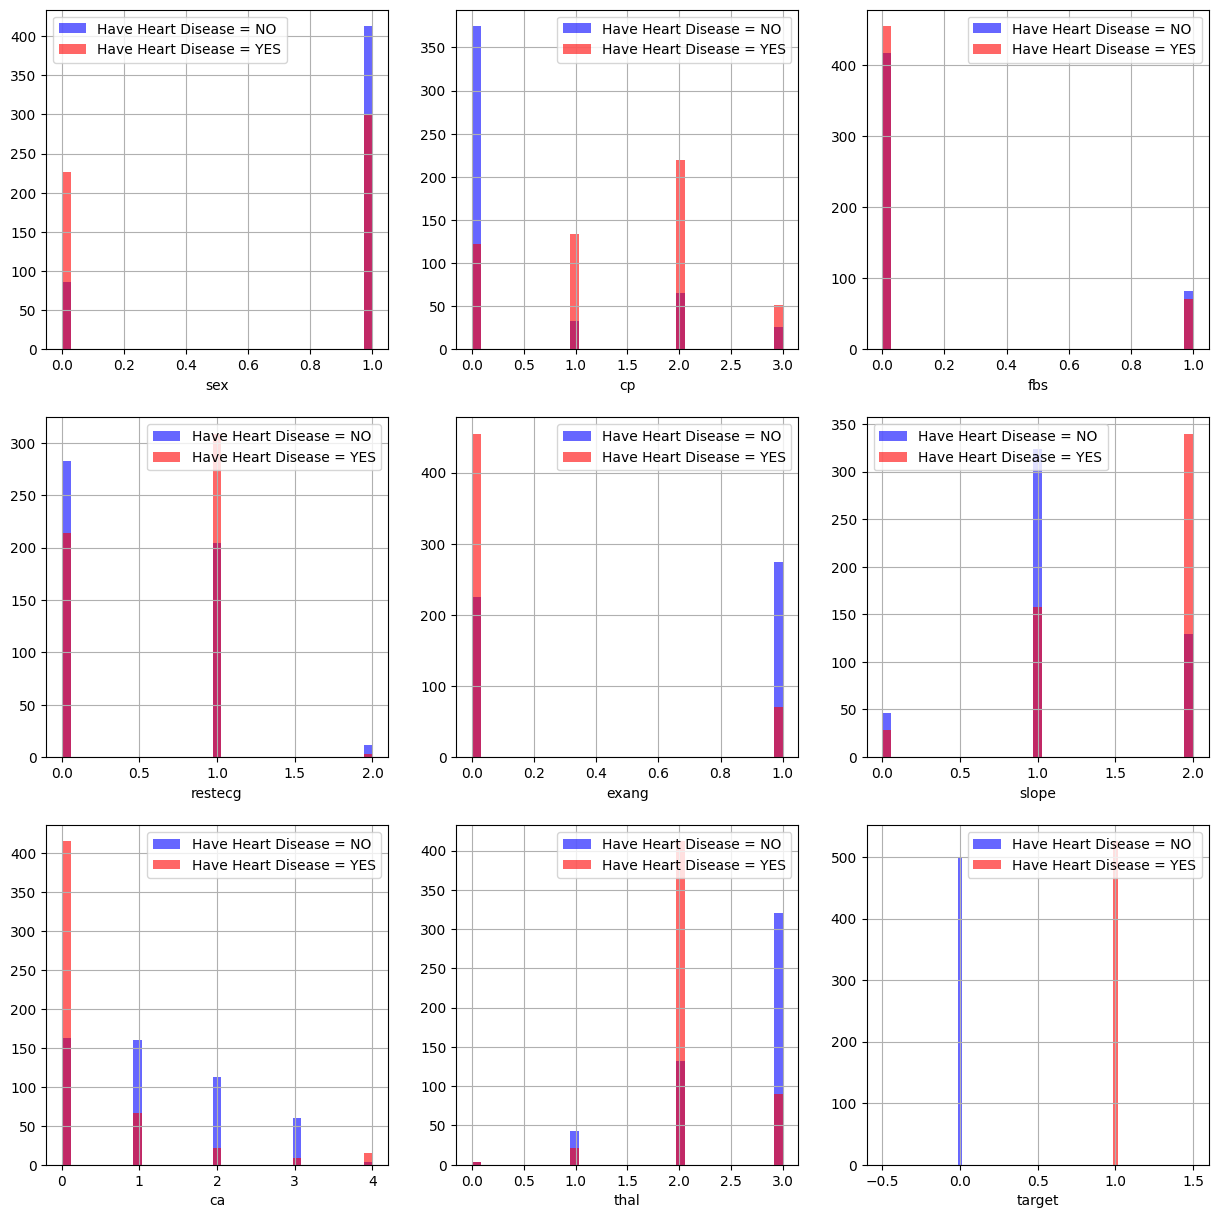

In [12]:
plt.figure(figsize=(15, 15))
#plotting the histogram for categorical varibles:
for i, column in enumerate(categorical_data, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

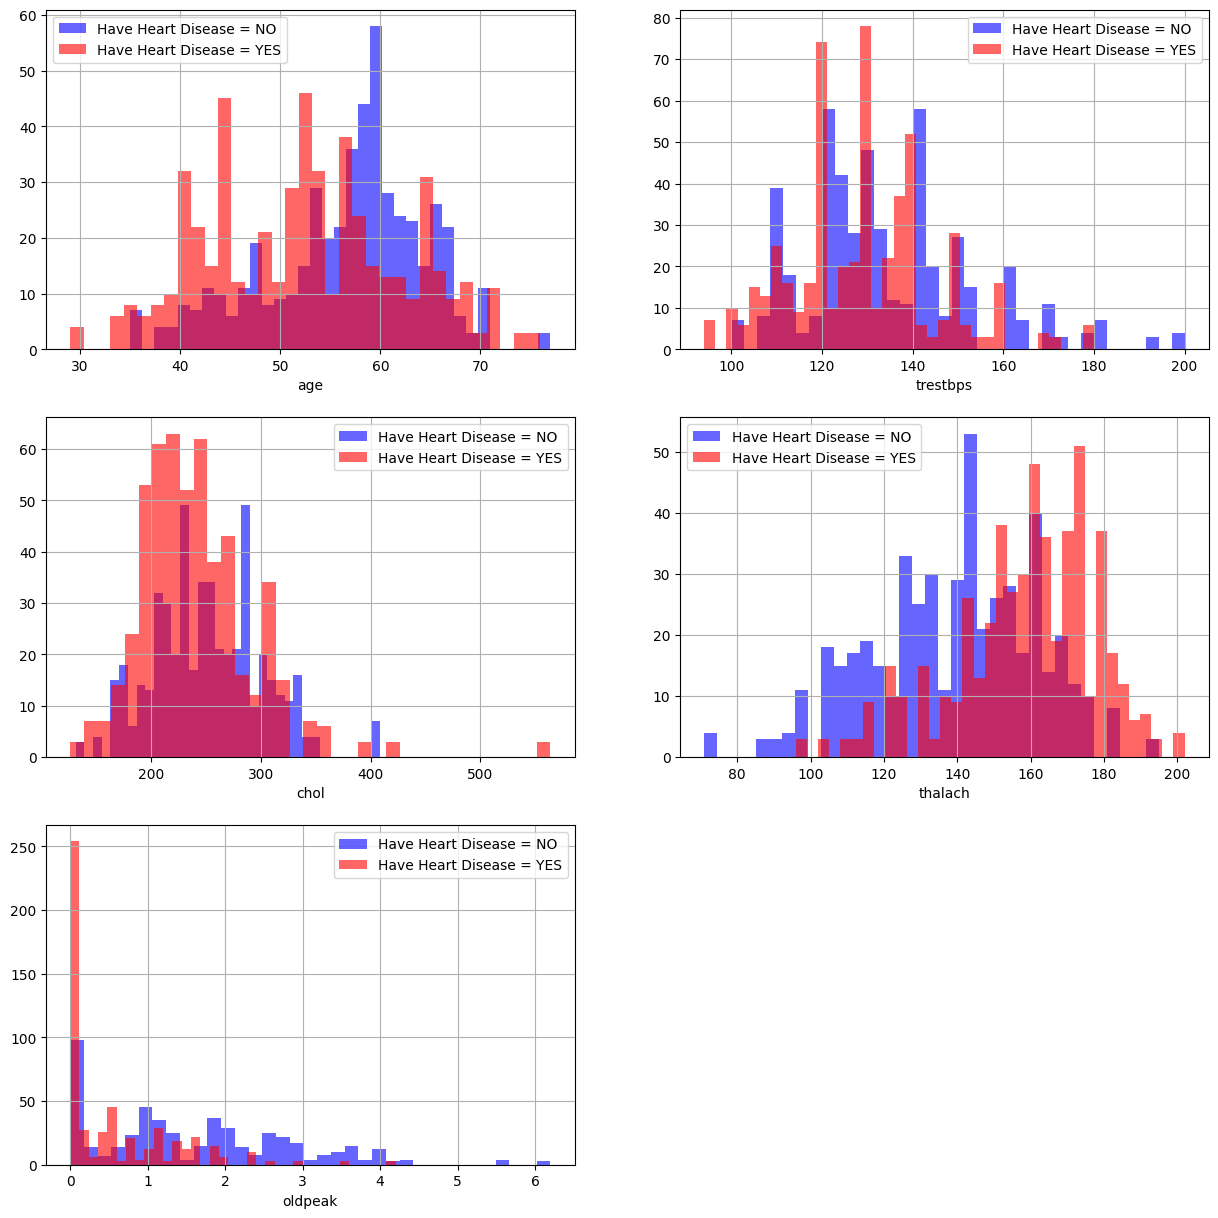

In [13]:
plt.figure(figsize=(15, 15))
#plotting the histogram for continous varibles:
for i, column in enumerate(continous_data, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

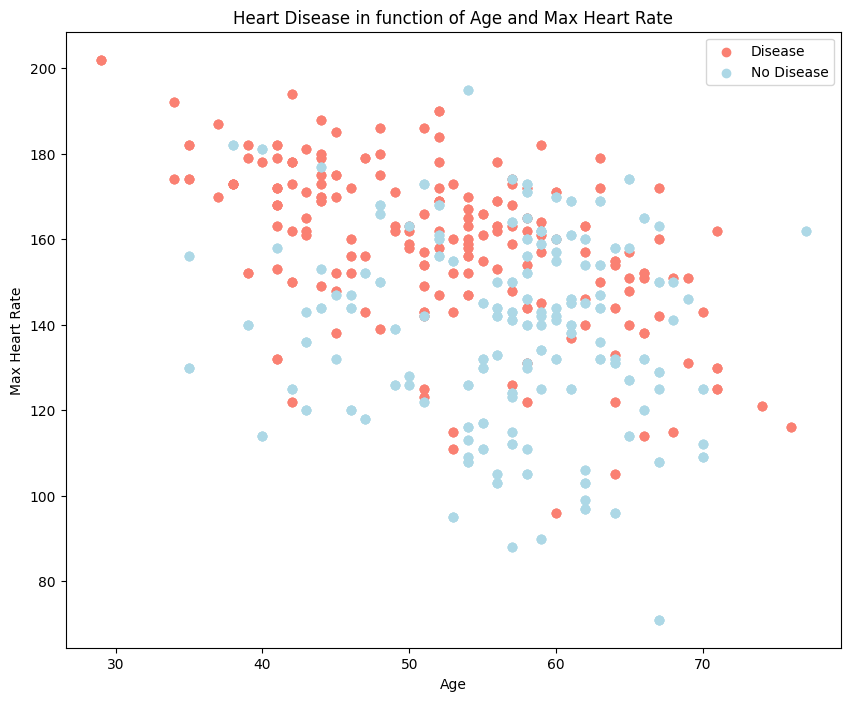

In [14]:
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

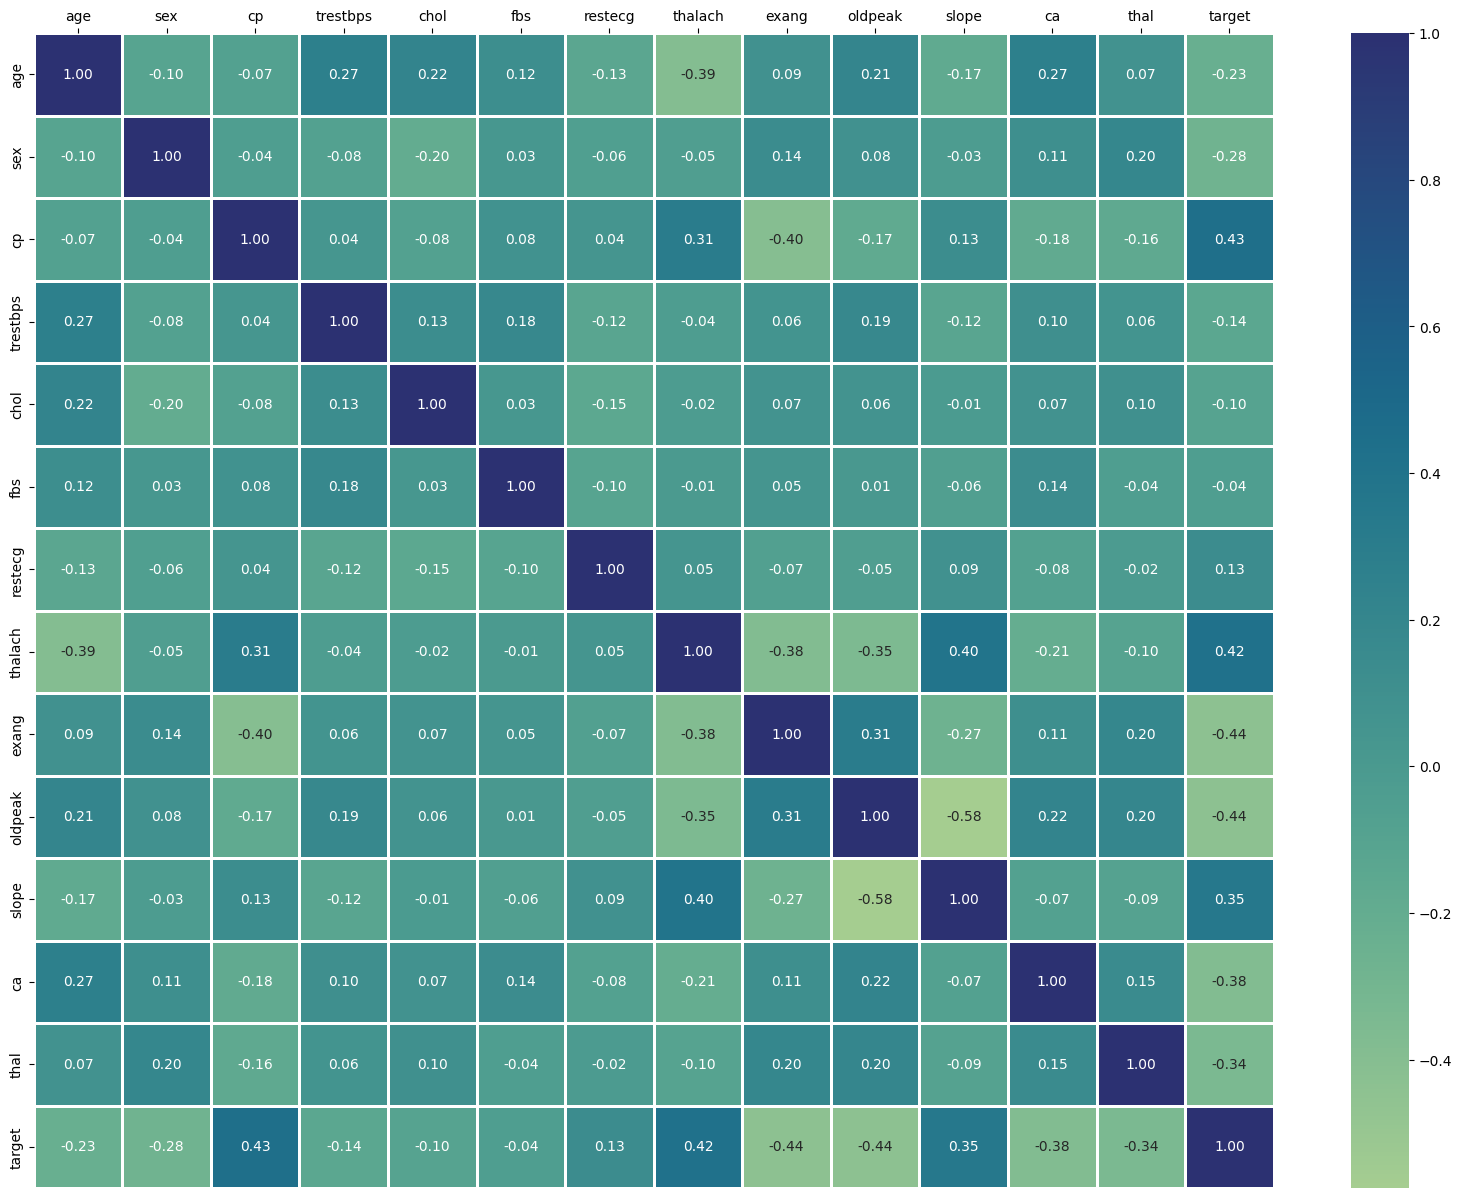

In [15]:
#creating a correlation matrix
corr = data.corr()
plt.figure(figsize=(20,15))
#ploting heatmap
ax = sns.heatmap(corr,annot=True,fmt=".2f",linewidth=2,cmap="crest")
ax.xaxis.tick_top()

<Axes: title={'center': 'Correlation with target'}>

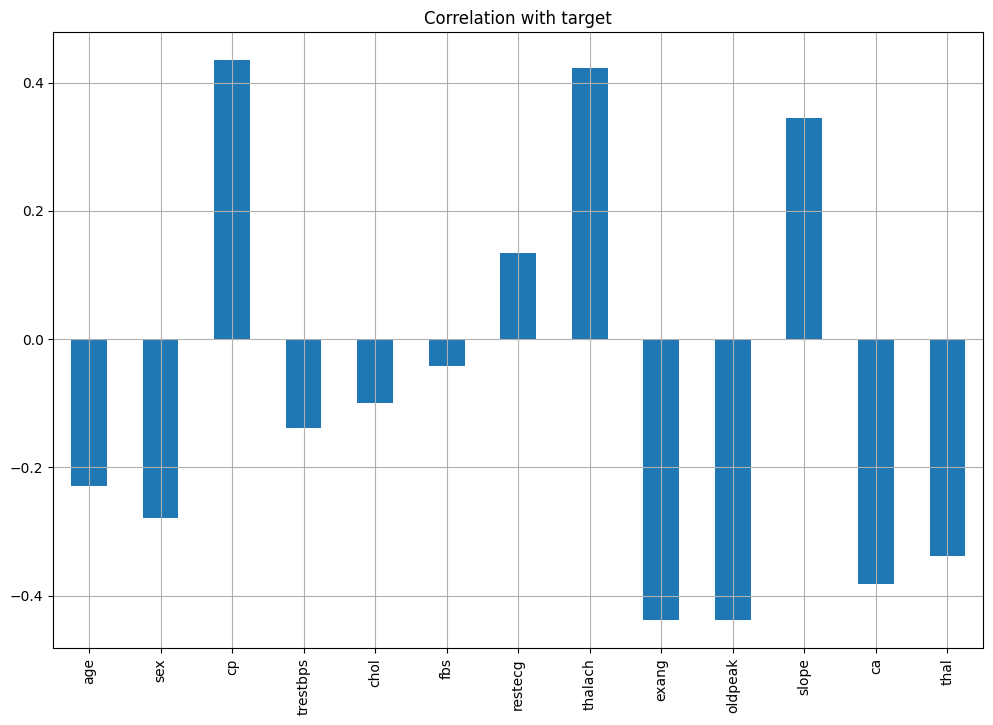

In [16]:
#ploting bar graph for correlation
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

# Data Processing

In [17]:
categorical_data.remove('target')
dataset = pd.get_dummies(data, columns = categorical_data)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        res = "Train Result".center(100,"-")
        print(res)
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

        cm = confusion_matrix(y_train, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
        disp.plot(cmap='Blues')
        plt.title("Confusion Matrix (Testing Set)")
        plt.show()

        print("_______________________________________________")
        print(f"Confusion Matrix: \n {cm}\n")
        
        # Precision-Recall Curve for Training Set
        proba = clf.predict_proba(X_train)[:, 1] 
        precision, recall, _ = precision_recall_curve(y_train, proba)
        average_precision = average_precision_score(y_train, proba)
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, color='blue', label=f'AP = {average_precision:.2f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve (Training Set)')
        plt.legend(loc="lower left")
        plt.grid()
        plt.show()

    elif train==False:
        pred = clf.predict(X_test)
        proba = clf.predict_proba(X_test)[:, 1]
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        res = "Test Result".center(100,'*')
        print(res)
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cm_test = confusion_matrix(y_test, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["No Disease", "Disease"])
        disp.plot(cmap='Blues')
        plt.title("Confusion Matrix (Testing Set)")
        plt.show()

        print(f"Confusion Matrix: \n {cm_test}\n")


        # Precision-Recall Curve for Testing Set
        precision, recall, _ = precision_recall_curve(y_test, proba)
        average_precision = average_precision_score(y_test, proba)
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, color='darkorange', label=f'AP = {average_precision:.2f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve (Testing Set)')
        plt.legend(loc="lower left")
        plt.grid()
        plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=92)

## Applying Logistic Regression

--------------------------------------------Train Result--------------------------------------------
Accuracy Score: 87.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.887879    0.855297  0.870293    0.871588      0.871156
recall       0.839542    0.899457  0.870293    0.869499      0.870293
f1-score     0.863034    0.876821  0.870293    0.869928      0.870110
support    349.000000  368.000000  0.870293  717.000000    717.000000


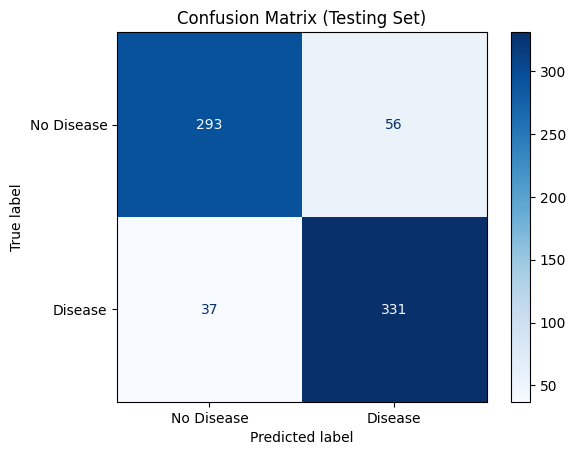

_______________________________________________
Confusion Matrix: 
 [[293  56]
 [ 37 331]]



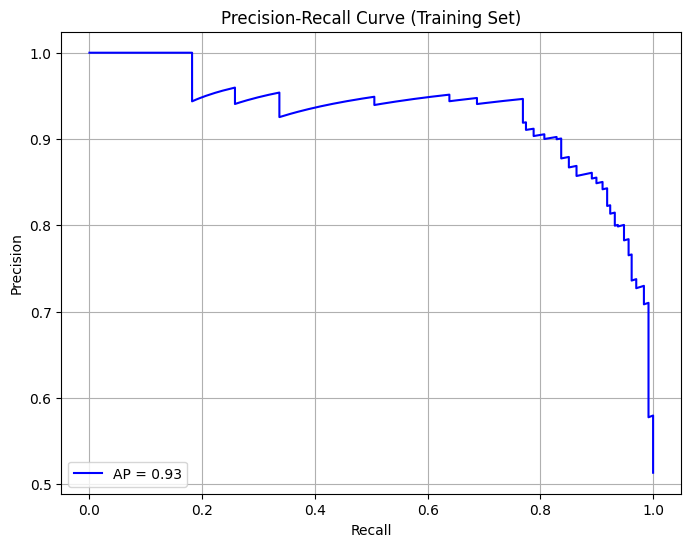

********************************************Test Result*********************************************
Accuracy Score: 90.58%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.929078    0.886228  0.905844    0.907653      0.907096
recall       0.873333    0.936709  0.905844    0.905021      0.905844
f1-score     0.900344    0.910769  0.905844    0.905556      0.905692
support    150.000000  158.000000  0.905844  308.000000    308.000000
_______________________________________________


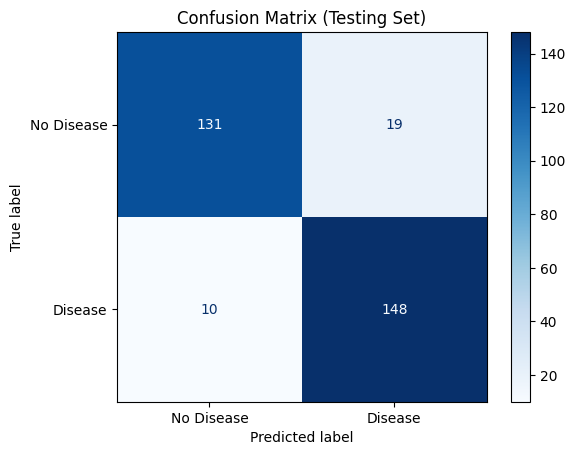

Confusion Matrix: 
 [[131  19]
 [ 10 148]]



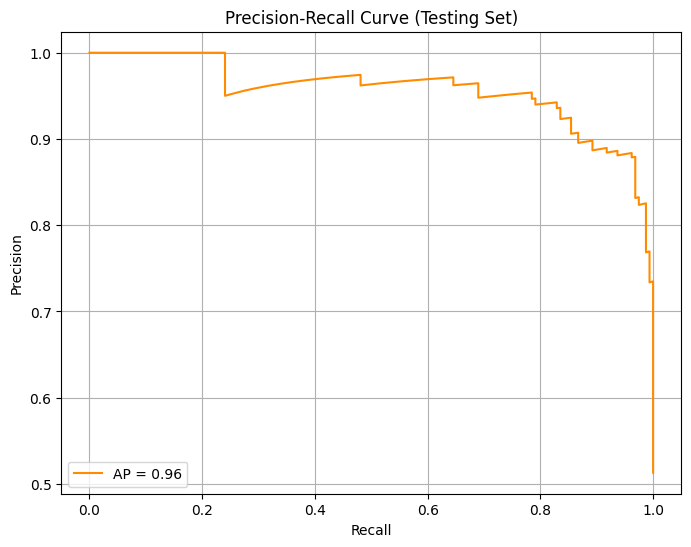

In [36]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [21]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.029289,90.584416


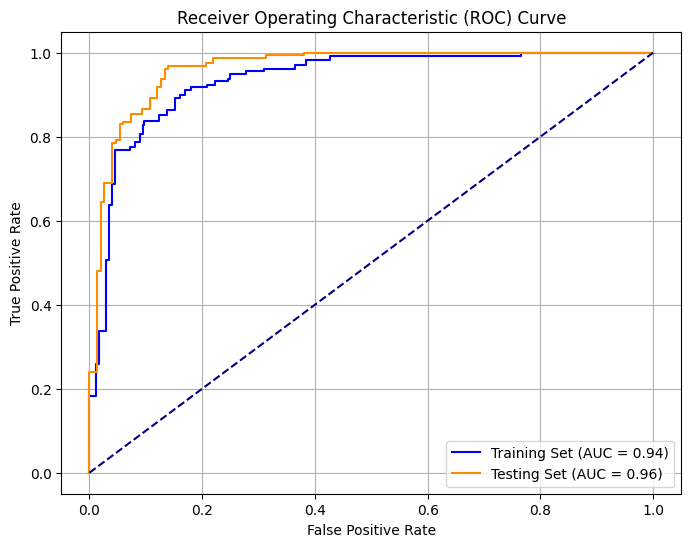

In [37]:
from sklearn.metrics import roc_curve, auc

# Probabilities for the positive class (Disease)
y_proba_train = lr_clf.predict_proba(X_train)[:, 1]
y_proba_test = lr_clf.predict_proba(X_test)[:, 1]

# Compute ROC Curve and AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing Set (AUC = {auc_test:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


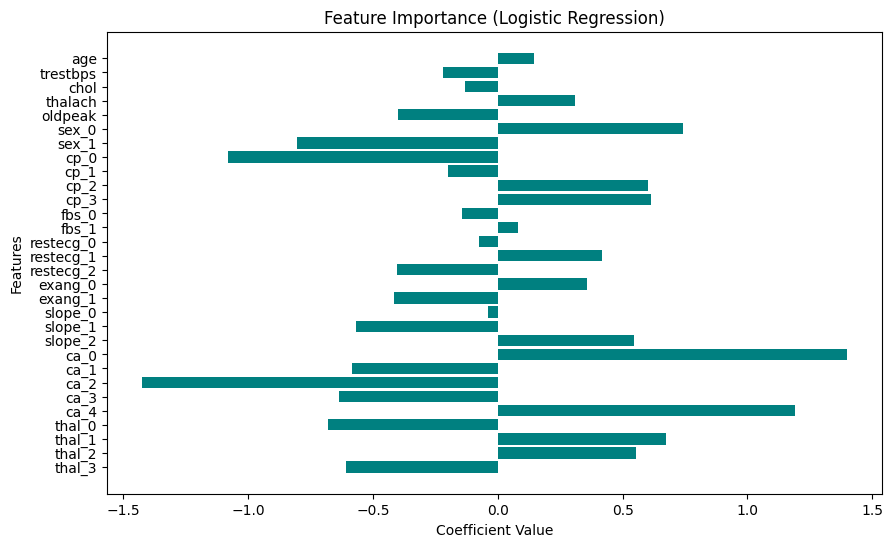

In [28]:
# Extract feature importance from Logistic Regression coefficients
feature_importances = lr_clf.coef_[0]
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='teal')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Flip for better readability
plt.show()
